In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
#### Load Data
# file path
DATA_IN = "/home/cascade/projects/UrbanHeat/data/"  # Note: Need ?dl=1 to make sure this file gets read correctly
FIG_OUT = "/home/cascade/projects/UrbanHeat/figures/animations/"

# HI DATA
FN_IN = 'processed/AllDATA-GHS-ERA5-HI406-FIGDATA.csv'
HI_STATS = pd.read_csv(DATA_IN+FN_IN)

# Z SCORES
FN_IN = 'processed/AllDATA-GHS-ERA5-HI406-ZSCORES.csv'
ZSCORES = pd.read_csv(DATA_IN+FN_IN)

# scale the date in the plot 
scale = 10**9 

In [3]:
ZSCORES

,Unnamed: 0,ID_HDC_G0,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,region,intermediate-region,sub-region,CTR_MN_NM,GCPNT_LAT,GCPNT_LON
0,0,1.0,-0.549168,-0.539658,-0.530149,1.702183,3.934514,-0.501621,-0.492111,-0.482602,...,-0.263886,-0.254376,1.977955,1.987465,Americas,Northern America,Northern America,United States,21.340678,-157.893497
1,1,10.0,-0.054362,-0.065482,-0.076602,-0.087721,-0.098841,-0.109960,-0.121080,-0.132200,...,-0.387950,-0.399070,-0.410190,-0.421309,Americas,Northern America,Northern America,United States,37.327115,-121.933299
2,2,12.0,-0.566953,2.276908,-0.548762,-0.539667,-0.530571,-0.521476,-0.512380,-0.503285,...,-0.294088,-0.284992,2.558868,-0.266801,Americas,Northern America,Northern America,United States,34.181962,-118.864105
3,3,14.0,-1.042491,3.295956,-0.980626,-0.949693,-0.918761,-0.026326,-0.856896,-0.825963,...,-0.114516,-0.083584,-0.052651,-0.021719,Americas,Northern America,Northern America,United States,33.953814,-117.953925
4,4,15.0,-0.100400,-0.109527,-0.118655,-0.127782,-0.136909,-0.146037,-0.155164,-0.164291,...,-0.374219,-0.383346,-0.392473,-0.401600,Americas,Northern America,Northern America,United States,38.246222,-122.632380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,11331,13128.0,0.018126,-0.002197,-0.022520,-0.042844,-0.063167,-0.083490,-0.103814,-0.124137,...,3.003460,-0.611897,-0.632221,-0.652544,Oceania,Melanesia,Melanesia,Papua New Guinea,-4.341531,152.274994
11332,11332,13132.0,-0.923172,-0.831561,-0.680758,-0.411575,1.041418,0.718696,-0.491882,0.369206,...,-0.009722,-1.220300,-1.543022,0.738637,Oceania,Melanesia,Melanesia,Papua New Guinea,-6.749761,155.693009
11333,11333,13133.0,0.577400,0.483915,0.390429,0.296943,0.203458,0.109972,0.016486,-0.076999,...,-0.243077,-0.489185,0.027819,4.513008,Oceania,Melanesia,Melanesia,Solomon Islands,-9.436571,159.963101
11334,11334,13134.0,0.180546,-0.235584,-0.274122,0.253728,-0.351198,-0.389736,-0.428274,-0.278016,...,-1.353187,-1.391725,0.457697,0.985547,Oceania,Melanesia,Melanesia,New Caledonia,-22.277587,166.452136


In [4]:
#### Get world shapes
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
#### Turn ZSCORES INTO GPD DF
# creating a geometry column 
geometry = [Point(xy) for xy in zip(ZSCORES['GCPNT_LON'], ZSCORES['GCPNT_LAT'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
ZSCORES_GPD = gpd.GeoDataFrame(ZSCORES, crs=crs, geometry=geometry)

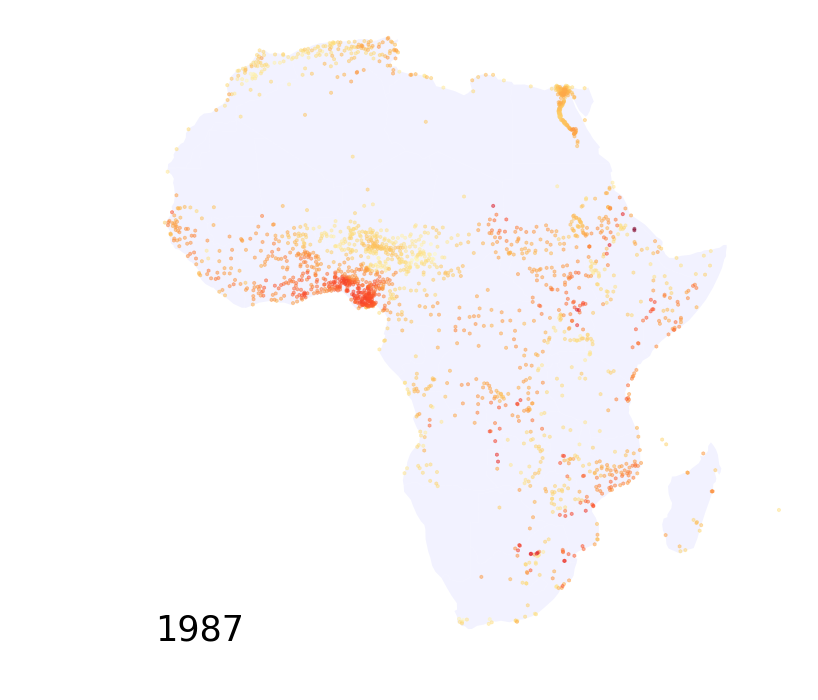

In [6]:
#### Set up the plot
variable = '1987'
geog = 'region'
location = 'Africa'
data = ZSCORES_GPD.sort_values(by = variable)
data = data[data[geog]==location]
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(20, 12))

#### Plot it
basemap = world[world['continent'] == 'Africa']
basemap.plot(color = 'blue', ax = ax, alpha = 0.05)
data.plot(column = variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor=None, marker = 'h',
         alpha = 0.5, markersize = 12)

#### Add year
plt.annotate(variable,
        xy=(0.19, .125), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top',
        fontsize=35);

#### Drop axis
plt.axis('off');

In [15]:
def map_plot(df, basemap, column, geog1, loc1, geog2, loc2, out_path):
    
    "quick plot of points on the world"
    
    #### Set up the plot
    variable = column
    geog = geog1
    location = loc1
    data = ZSCORES_GPD.sort_values(by = variable)
    #data = data[data[geog]==location]
    vmin, vmax = 120, 220
    fig, ax = plt.subplots(1, figsize=(5, 3))

    #### Plot it
    base = basemap #basemap[basemap['continent'] == loc2]
    base.plot(color = 'blue', ax = ax, alpha = 0.05)
    data.plot(column = variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor=None, marker = 'h',
             alpha = 0.3, markersize = 8)

    #### Add year
    plt.annotate(variable,
            xy=(0.19, .125), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35);
    
    #### Drop axis
    plt.axis('off');
    
    plt.savefig(out_path+variable+'.png', dpi=300)

/home/cascade/miniconda3/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


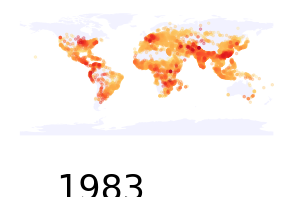

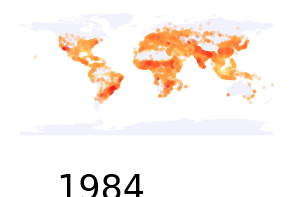

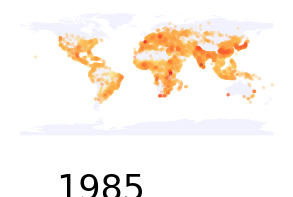

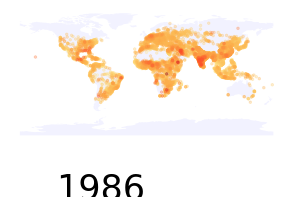

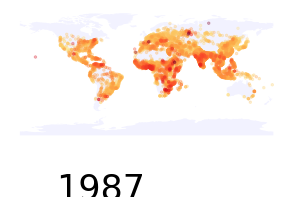

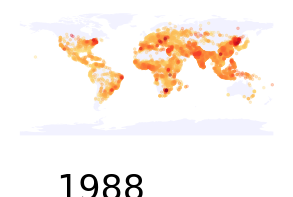

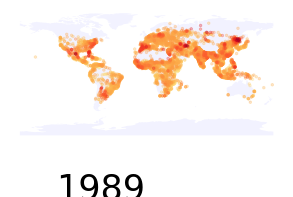

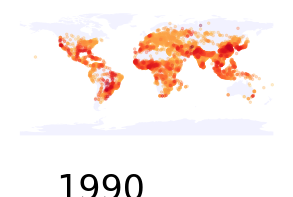

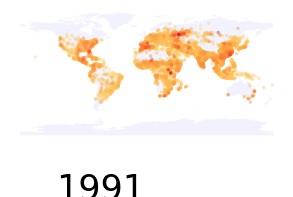

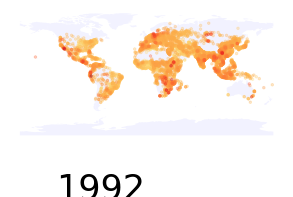

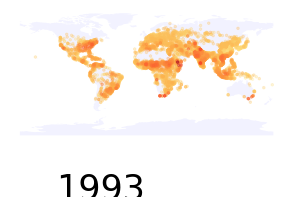

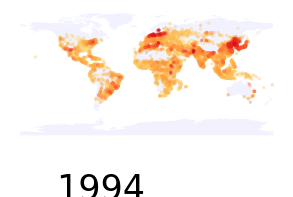

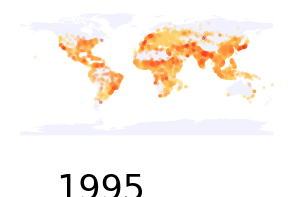

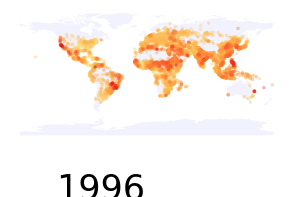

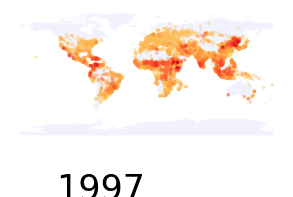

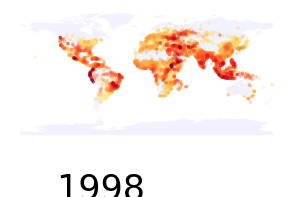

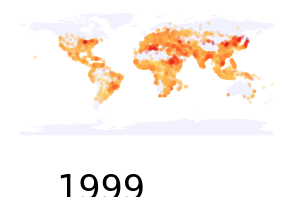

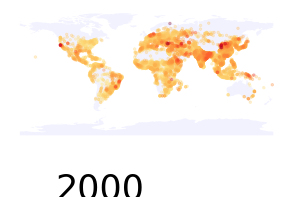

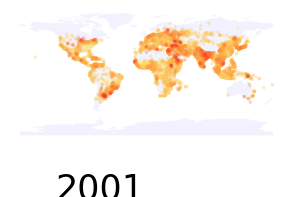

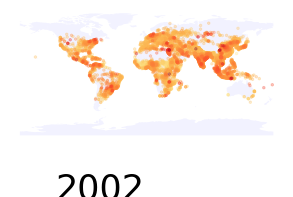

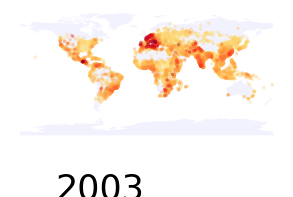

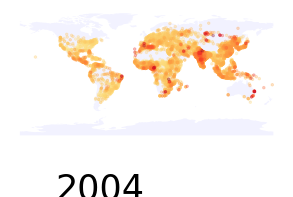

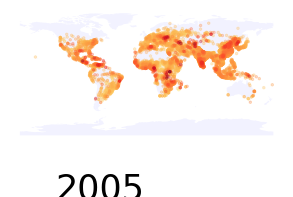

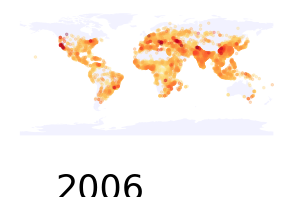

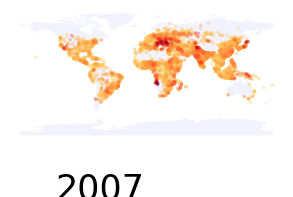

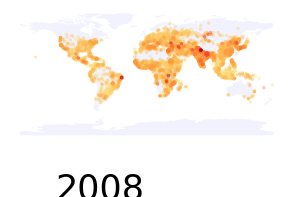

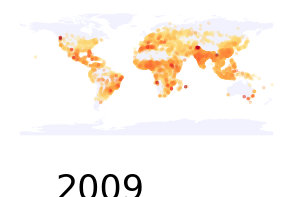

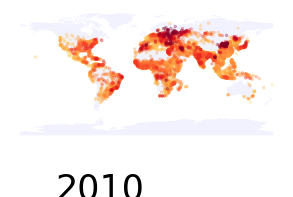

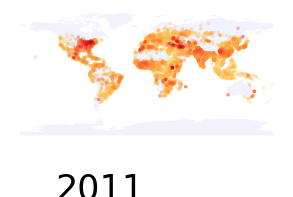

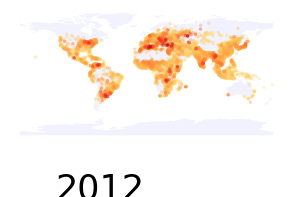

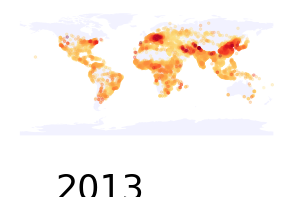

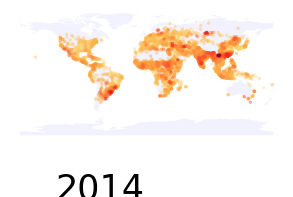

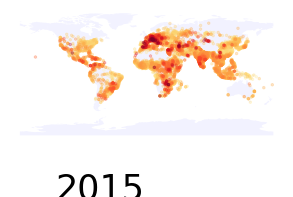

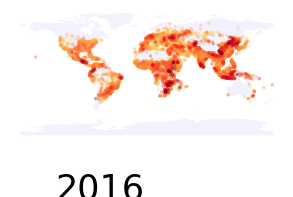

In [16]:
#### Loop
year_list = list(ZSCORES_GPD.columns[2:36])

for year in year_list:
    map_plot(ZSCORES_GPD, world, year, 'region', 'Africa', 'continent', 'Africa',FIG_OUT)

In [17]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = sorted(glob.glob(FIG_OUT+"*.png"))
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# save into a GIF file that loops forever
frames[0].save(FIG_OUT+'WorldZscores.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=400, loop=0)